# K-means对超市客户分组并用轮廓系数进行评估

### 案例描述
超市想对客户做分组，然后针对每一组客户采取特定措施来增加利润。某大型超市拥有客户ID、客户性别、年龄、年收入、消费指数的数据。使用K-Means模型对客户做分组。现在通过轮廓系数选择最优K值。

### 案例字段
200条超市客户数据，数据包括客户ID、性别、年龄、年收入和消费指数字段

### 字段解释
- CustomerID: 客户ID
- Genre: 性别
- Age: 年龄
- Annual Income (k$): 年收入（单位是K美元）
- Spending Score (1-100): 消费指数（范围在1-100之间）


In [16]:
## 导入包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
## 导入数据
data=pd.read_csv("./data/Mall_Customers.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
## 检查缺失数据
def calcNull(data):
    nullSum=data.isnull().sum()
    nullSum=nullSum.drop(nullSum[nullSum.values==0].index)
    return nullSum

calcNull(data)

Series([], dtype: int64)

In [6]:
## 去除CustomerID列
data.drop(["CustomerID"],axis=1,inplace=True)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
## 使用独热码对性别进行编码
data=pd.get_dummies(data,drop_first=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [10]:
## 特征缩放
SC=StandardScaler()
X=SC.fit_transform(data)
X

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

## 使用K-Means算法进行分类

```python
def kmeans(data:数据集
           K: 最后聚成多少类
           bestLabels: Any,
           criteria: 迭代终止条件
           attempts: Any,
           flags: Any) -> None

```
n_clusters：整型，缺省值=8 ，生成的聚类数。
max_iter：整型，缺省值=300 。
　　　　执行一次k-means算法所进行的最大迭代数。
　　n_init：整型，缺省值=10 。
　　　　　 用不同的聚类中心初始化值运行算法的次数，最终解是在inertia意义下选出的最优结果。
　　init：有三个可选值：’k-means++’， ‘random’，或者传递一个ndarray向量。
　　　　 此参数指定初始化方法，默认值为 ‘k-means++’。
　　　　（１）‘k-means++’ 用一种特殊的方法选定初始聚类中发，可加速迭代过程的收敛。
　　　　（２）‘random’ 随机从训练数据中选取初始质心。
　　　　（３）如果传递的是一个ndarray，则应该形如 (n_clusters, n_features) 并给出初始质心。
　　precompute_distances：三个可选值，‘auto’，True 或者 False。
　　　　预计算距离，计算速度更快但占用更多内存。
　　　　（１）‘auto’：如果 样本数乘以聚类数大于 12million 的话则不预计算距离。
　　　　（２）True：总是预先计算距离。
　　　　（３）False：永远不预先计算距离。
　　tol：float类型，默认值= 1e-4　与inertia结合来确定收敛条件。
　　n_jobs：整形数。　指定计算所用的进程数。内部原理是同时进行n_init指定次数的计算。
　　　　（１）若值为 -1，则用所有的CPU进行运算。若值为1，则不进行并行运算。
　　　　（２）若值小于-1，则用到的CPU数为(n_cpus + 1 + n_jobs)。因此如果 n_jobs值为-2，则用到的CPU数为总CPU数减1。
　　random_state：整型或 numpy.RandomState 类型，可选
　　　　　用于初始化质心的生成器（generator）。如果值为一个整数，则确定一个seed。此参数默认值为numpy的随机数生成器。
　　copy_x：布尔型，默认值=True 　　
　　　　　　 当我们precomputing distances时，将数据中心化会得到更准确的结果。如果把此参数值设为True，则原始数据不会被改变。如果是False，则会直接在原始数据

In [35]:
## 使用肘部法则选择最优的K值
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\Orange\anaconda3\envs\mlLearn\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 386.7147857740689,
 325.44857048543486,
 275.19500469394814,
 236.25761095237866,
 200.31388217165548,
 174.12493921599284,
 152.02983429775693,
 137.1726516633583,
 127.86560025606873,
 114.52038092919224,
 106.99872070690607,
 100.18630060748168,
 93.43568422575254,
 88.88020968203546,
 82.26653662178542,
 79.9788115806864]

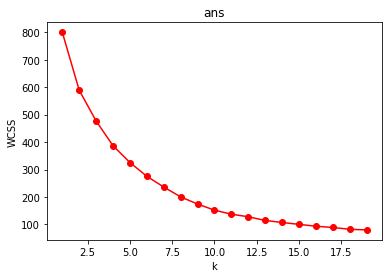

In [36]:
## 绘制 K-WCSS折线图
plt.figure()
plt.plot(range(1, 20), wcss, 'ro-')
plt.title('ans')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()#k=4时下降不再明显

In [18]:
## 计算不同k值对应的轮廓系数
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    silhouette = silhouette_score(X, y_kmeans)
    print('当聚类个数是%d时，对应的轮廓系数是%.4f' %(i, silhouette))
#k=11时 轮廓系数最高

当聚类个数是2时，对应的轮廓系数是0.2518
当聚类个数是3时，对应的轮廓系数是0.2595
当聚类个数是4时，对应的轮廓系数是0.3016
当聚类个数是5时，对应的轮廓系数是0.3158
当聚类个数是6时，对应的轮廓系数是0.3237
当聚类个数是7时，对应的轮廓系数是0.3576
当聚类个数是8时，对应的轮廓系数是0.3876
当聚类个数是9时，对应的轮廓系数是0.4025
当聚类个数是10时，对应的轮廓系数是0.4208
当聚类个数是11时，对应的轮廓系数是0.4300
当聚类个数是12时，对应的轮廓系数是0.4208
当聚类个数是13时，对应的轮廓系数是0.4287
当聚类个数是14时，对应的轮廓系数是0.4215
当聚类个数是15时，对应的轮廓系数是0.4263
当聚类个数是16时，对应的轮廓系数是0.4219
当聚类个数是17时，对应的轮廓系数是0.4121
当聚类个数是18时，对应的轮廓系数是0.4156
当聚类个数是19时，对应的轮廓系数是0.4114


In [33]:
#选取k=11
kmeans = KMeans(n_clusters = 11, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([ 1,  1, 10,  2, 10,  2, 10,  2,  7,  2,  7,  2, 10,  2,  7,  1, 10,
        1,  7,  2,  1,  1, 10,  1, 10,  1, 10,  1, 10,  2,  7,  2,  7,  1,
       10,  2, 10,  2, 10,  2,  0,  1,  8,  2, 10,  2,  0,  9,  9,  9,  0,
        1,  9,  8,  0,  8,  0,  8,  9,  8,  8,  1,  0,  0,  8,  1,  0,  0,
        1,  9,  8,  0,  0,  0,  8,  1,  0,  1,  9,  0,  8,  1,  8,  0,  9,
        8,  0,  9,  9,  0,  0,  1,  8,  9,  9,  1,  0,  9,  8,  1,  9,  0,
        8,  1,  8,  9,  0,  8,  8,  8,  8,  9,  9,  1,  9,  9,  0,  0,  0,
        0,  1,  9,  9,  3,  9,  5,  6,  3,  6,  3,  6,  3,  9,  5,  6,  5,
        4,  3,  6,  5,  4,  3,  9,  5,  6,  3,  6,  5,  4,  3,  6,  3,  4,
        5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  4,  3,
        6,  3,  6,  3,  4,  5,  6,  3,  6,  3,  4,  5,  6,  5,  4,  3,  4,
        3,  4,  5,  4,  5,  6,  5,  4,  5,  4,  3,  6,  3])

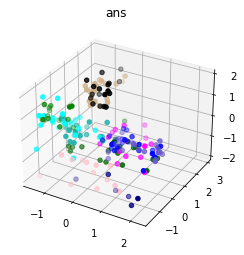

In [34]:
## 可视化结果
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot( projection='3d')  # 创建一个三维的绘图工程
ax.set_title('ans')  # 设置本图名称
ax.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],X[y_kmeans==0,2],c="blue")
ax.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],X[y_kmeans==1,2],c="cyan")
ax.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],X[y_kmeans==2,2],c="green")
ax.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],X[y_kmeans==3,2],c="black")
ax.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],X[y_kmeans==4,2],c="magenta")
ax.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],X[y_kmeans==5,2],c="tan")
ax.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],X[y_kmeans==6,2],c="darkgreen")
ax.scatter(X[y_kmeans==7,0],X[y_kmeans==7,1],X[y_kmeans==7,2],c="navy")
ax.scatter(X[y_kmeans==8,0],X[y_kmeans==8,1],X[y_kmeans==8,2],c="slateblue")
ax.scatter(X[y_kmeans==9,0],X[y_kmeans==9,1],X[y_kmeans==9,2],c="lightseagreen")
ax.scatter(X[y_kmeans==10,0],X[y_kmeans==10,1],X[y_kmeans==10,2],c="pink")
plt.show()